In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('C:/Users/Artophilic/Datascience Bootcamp/Network_pract/Dataset/UNSW-NB15_4.csv')

In [3]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
df = df.drop(columns=["proto","service","state","attack_cat"])

In [5]:
df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,...,1,1,1,0,0,0,1,1,0,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,...,1,1,2,0,0,0,1,6,0,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,...,1,1,3,0,0,0,2,6,0,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2740.178955,...,1,1,3,1,1,0,2,1,0,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8561.499023,...,2,1,40,0,0,0,2,39,0,0


In [6]:
df.isnull().sum()

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label                0
dtype: int64

In [7]:
df.dtypes

id                     int64
dur                  float64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm         int64
is_ftp_login  

In [8]:
len(df.loc[df['sbytes'] == " "])

0

In [9]:
#Splitting the data into independent and dependent data

X = df.drop(columns=['label']).copy()
X.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,...,1,1,1,1,0,0,0,1,1,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,...,1,1,1,2,0,0,0,1,6,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,...,2,1,1,3,0,0,0,2,6,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2740.178955,...,2,1,1,3,1,1,0,2,1,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8561.499023,...,2,2,1,40,0,0,0,2,39,0


In [10]:
y = df['label'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [11]:
#One hot encoding : It is a technique to take data which is cateogrical
#and putting up in the format that most of the ML algo can use.
#Lots of ML algo natively support continuous non categorical data

y.unique()

array([0, 1])

In [12]:
#XGboost uses sparse matrices which only deals with 1s and does not allocate memory to 0

In [13]:
sum(y)/len(y)

0.6806223302022916

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

In [15]:
sum(y_train)/len(y_train)

0.680620508725904

In [16]:
sum(y_test)/len(y_test)

0.6806277945067981

In [17]:
#We use stratify to keep the dependent dataset balance

In [18]:
clf_xbg = xgb.XGBClassifier()

In [19]:
import sklearn
evaluation=[(X_train,y_train)]
try:
    clf_xbg.fit(  
    X_train,  
    y_train,  
    eval_set= evaluation,  
    verbose = True)
except AttributeError:
    print("Found best iterations")

[0]	validation_0-logloss:0.40162
[1]	validation_0-logloss:0.28911
[2]	validation_0-logloss:0.21922
[3]	validation_0-logloss:0.17233
[4]	validation_0-logloss:0.13819
[5]	validation_0-logloss:0.11480
[6]	validation_0-logloss:0.09744
[7]	validation_0-logloss:0.08542
[8]	validation_0-logloss:0.07568
[9]	validation_0-logloss:0.06861
[10]	validation_0-logloss:0.06314
[11]	validation_0-logloss:0.05868
[12]	validation_0-logloss:0.05400
[13]	validation_0-logloss:0.05105
[14]	validation_0-logloss:0.04798
[15]	validation_0-logloss:0.04534
[16]	validation_0-logloss:0.04323
[17]	validation_0-logloss:0.04221
[18]	validation_0-logloss:0.04022
[19]	validation_0-logloss:0.03929
[20]	validation_0-logloss:0.03645
[21]	validation_0-logloss:0.03578
[22]	validation_0-logloss:0.03336
[23]	validation_0-logloss:0.03220
[24]	validation_0-logloss:0.03167
[25]	validation_0-logloss:0.03136
[26]	validation_0-logloss:0.03030
[27]	validation_0-logloss:0.02930
[28]	validation_0-logloss:0.02883
[29]	validation_0-loglos

In [20]:
y_pred = clf_xbg.predict(X_test)

In [21]:
print(confusion_matrix(y_pred,y_test))

[[13882   122]
 [  118 29714]]


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14004
           1       1.00      1.00      1.00     29832

    accuracy                           0.99     43836
   macro avg       0.99      0.99      0.99     43836
weighted avg       0.99      0.99      0.99     43836



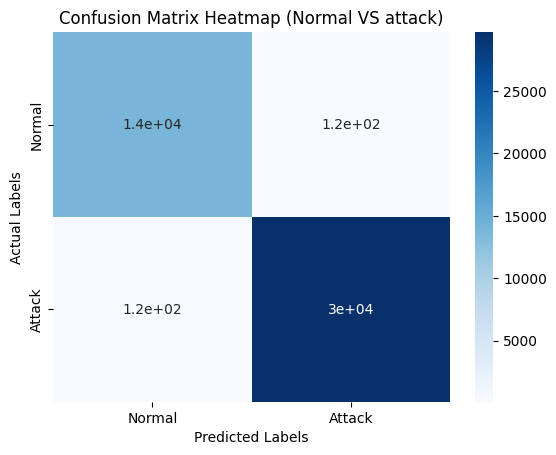

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
Confusion_mat = confusion_matrix(y_pred,y_test)
sns.heatmap(Confusion_mat, cmap='Blues', annot=True)
plt.xticks(np.arange(2)+0.5, ['Normal','Attack'])
plt.yticks(np.arange(2)+0.5, ['Normal','Attack'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix Heatmap (Normal VS attack)")
plt.show()

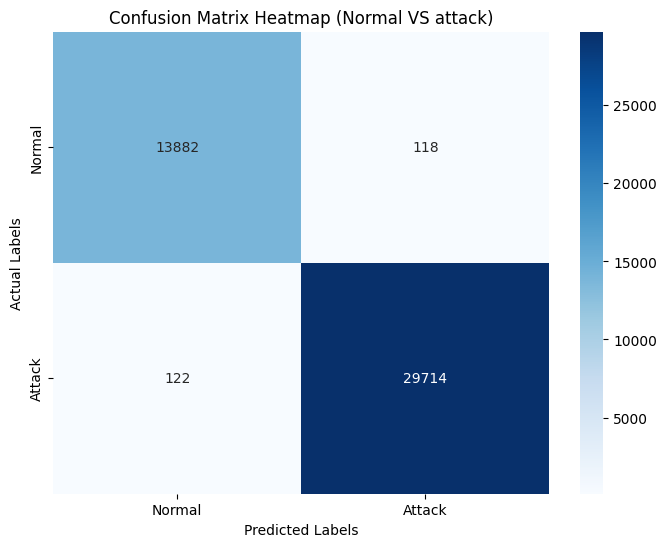

In [24]:
cm = np.array([[13882, 118], [122, 29714]])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d')
plt.xticks(np.arange(2)+0.5, ['Normal','Attack'])
plt.yticks(np.arange(2)+0.5, ['Normal','Attack'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix Heatmap (Normal VS attack)")
plt.show()

True Positives (TP):Attack to Attack: 29,714. This represents the number of attack instances correctly classified as attacks.
True Negatives (TN):Normal to Normal: 13,882. This represents the number of normal instances correctly classified as normal.
False Positives (FP):Normal to Attack: 118. These are normal instances incorrectly classified as attacks.
False Negatives (FN):Attack to Normal: 122. These are attack instances incorrectly classified as normal.

Accuracy = (TP+TN)/(TP+TN+FP+FN)
precision for attack = TP/(TP+FP)
Recall for attack = TP/(TP+FN)
precision for attack = TN/(TN+FN)
Recall for attack = TN/(TN+FP)

Conclusion : 
While accuracy is high,the relatively small counts of 118 false positives and 122 false negatives suggest that your model is performing well in distinguishing attacks from normal traffic.

However,
False positives might indicate minor noise or misclassification of benign anomalies as attacks.
False negatives mean a few attacks are being missed, which is critical to improve.


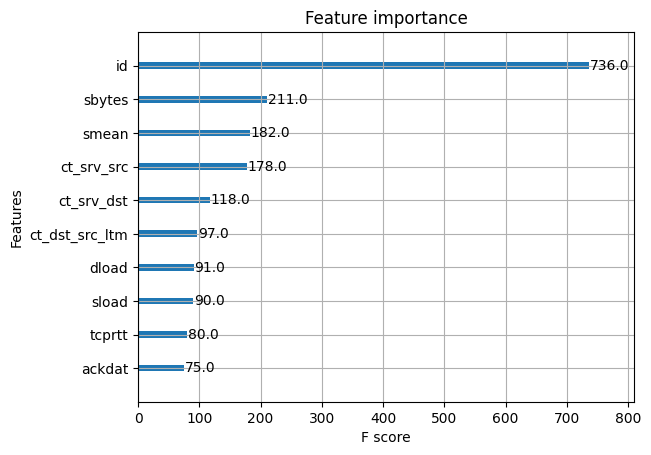

In [25]:
#understanding which features are driving its decisions

#According to weights
xgb.plot_importance(clf_xbg, importance_type='weight',max_num_features=10)
plt.show()

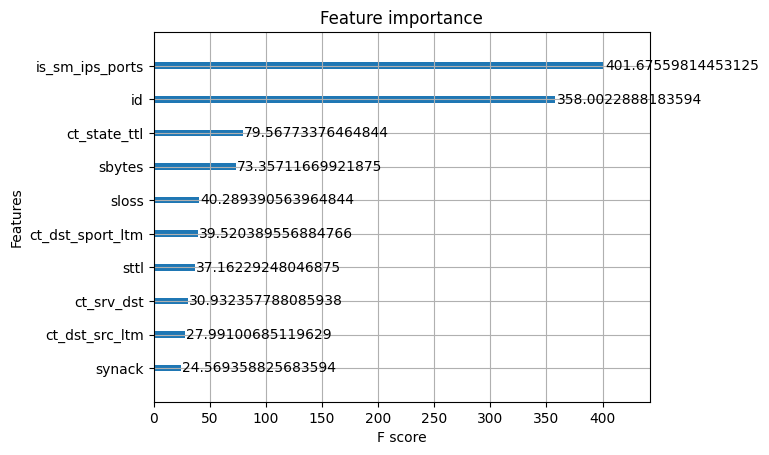

In [26]:
#According to gain
xgb.plot_importance(clf_xbg, importance_type='gain',max_num_features=10)
plt.show()

In [27]:
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])

In [28]:
clf1_xbg = xgb.XGBClassifier()
evaluation=[(X_train,y_train)]
try:
    clf1_xbg.fit(  
    X_train,  
    y_train,  
    eval_set= evaluation,  
    verbose = True)
except AttributeError:
    print("Found best iterations")

[0]	validation_0-logloss:0.42336
[1]	validation_0-logloss:0.32409
[2]	validation_0-logloss:0.26109
[3]	validation_0-logloss:0.21839
[4]	validation_0-logloss:0.18944
[5]	validation_0-logloss:0.16815
[6]	validation_0-logloss:0.15335
[7]	validation_0-logloss:0.14207
[8]	validation_0-logloss:0.13379
[9]	validation_0-logloss:0.12773
[10]	validation_0-logloss:0.12271
[11]	validation_0-logloss:0.11882
[12]	validation_0-logloss:0.11555
[13]	validation_0-logloss:0.11303
[14]	validation_0-logloss:0.11088
[15]	validation_0-logloss:0.10941
[16]	validation_0-logloss:0.10834
[17]	validation_0-logloss:0.10701
[18]	validation_0-logloss:0.10630
[19]	validation_0-logloss:0.10546
[20]	validation_0-logloss:0.10461
[21]	validation_0-logloss:0.10381
[22]	validation_0-logloss:0.10317
[23]	validation_0-logloss:0.10180
[24]	validation_0-logloss:0.10110
[25]	validation_0-logloss:0.10054
[26]	validation_0-logloss:0.10035
[27]	validation_0-logloss:0.09935
[28]	validation_0-logloss:0.09886
[29]	validation_0-loglos

In [29]:
y_pred1 = clf1_xbg.predict(X_test)

In [30]:
print(confusion_matrix(y_pred1,y_test))

[[12913   764]
 [ 1087 29072]]


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     13677
           1       0.97      0.96      0.97     30159

    accuracy                           0.96     43836
   macro avg       0.95      0.95      0.95     43836
weighted avg       0.96      0.96      0.96     43836



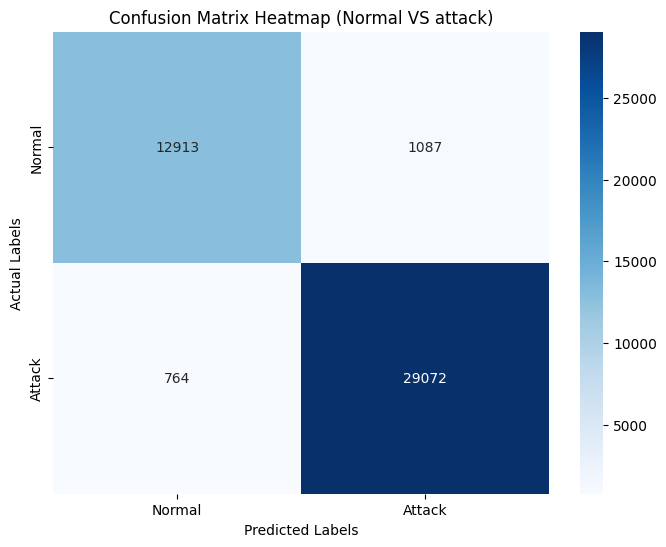

In [32]:
cm = np.array([[12913, 1087], [764, 29072]])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d')
plt.xticks(np.arange(2)+0.5, ['Normal','Attack'])
plt.yticks(np.arange(2)+0.5, ['Normal','Attack'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix Heatmap (Normal VS attack)")
plt.show()

In [33]:
#The accuracy dropped to 0.96 as the model was likely overfitting to the
#column ID which does not have any inputs in predicting anomalies

#The FPR increases because model was overly reliant on ID

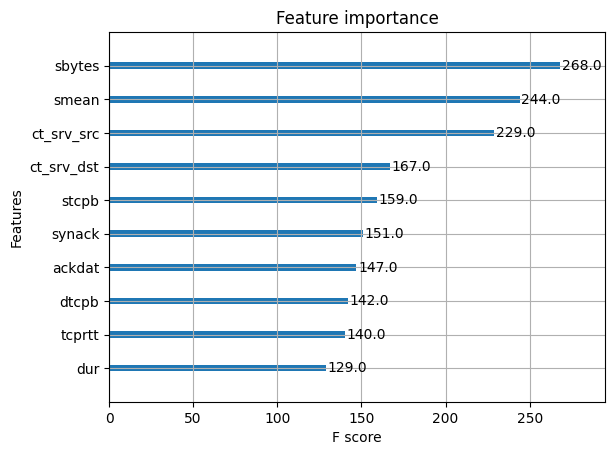

In [34]:
xgb.plot_importance(clf1_xbg, importance_type='weight',max_num_features=10)
plt.show()

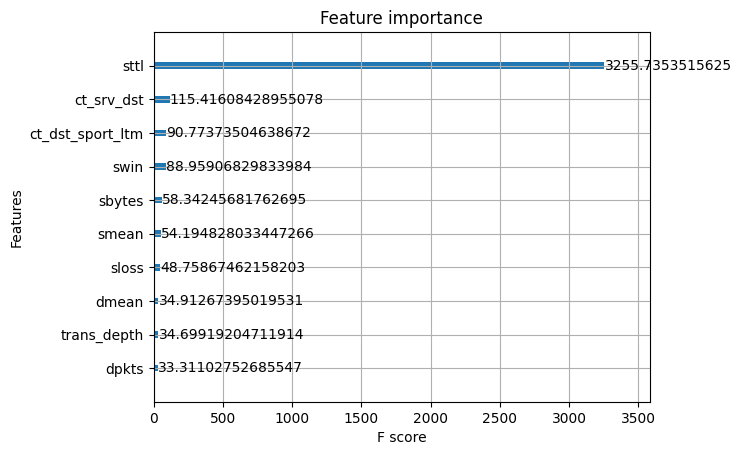

In [35]:
#According to gain after removing ID
xgb.plot_importance(clf1_xbg, importance_type='gain',max_num_features=10)
plt.show()

In [36]:
#According to weight, sbytes, smean, ct_srv_src are top 3 feature
#Examining feature distributions


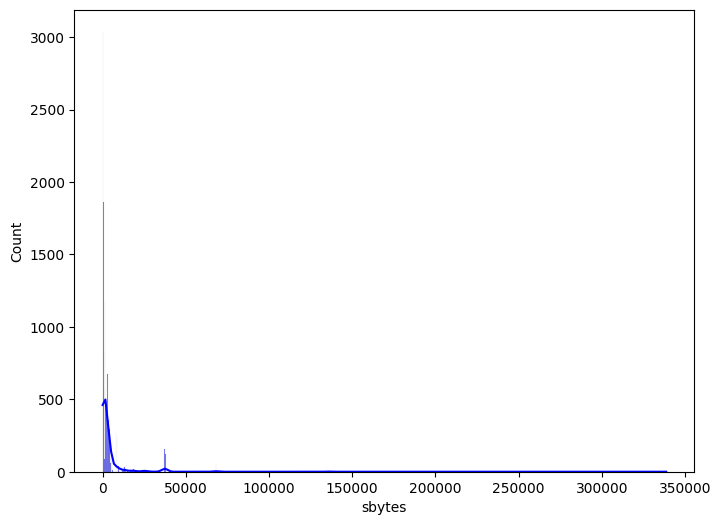

In [37]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(X_test['sbytes'][y_test == 0], kde=True, label='Normal', color='blue')
plt.show()

In [39]:
X_test[y_test == 1].count()

dur                  29836
spkts                29836
dpkts                29836
sbytes               29836
dbytes               29836
rate                 29836
sttl                 29836
dttl                 29836
sload                29836
dload                29836
sloss                29836
dloss                29836
sinpkt               29836
dinpkt               29836
sjit                 29836
djit                 29836
swin                 29836
stcpb                29836
dtcpb                29836
dwin                 29836
tcprtt               29836
synack               29836
ackdat               29836
smean                29836
dmean                29836
trans_depth          29836
response_body_len    29836
ct_srv_src           29836
ct_state_ttl         29836
ct_dst_ltm           29836
ct_src_dport_ltm     29836
ct_dst_sport_ltm     29836
ct_dst_src_ltm       29836
is_ftp_login         29836
ct_ftp_cmd           29836
ct_flw_http_mthd     29836
ct_src_ltm           29836
c

In [40]:
attack_sample = X_test[y_test == 1].sample(n=1000,random_state=42)

In [41]:
attack_sample.shape

(1000, 39)

c:\Users\Artophilic\anaconda3\envs\netvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


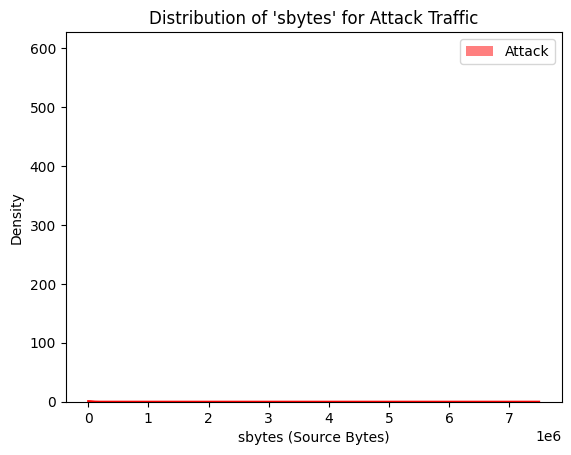

In [42]:
sns.histplot(attack_sample['sbytes'], kde=True, label='Attack', color='red')
plt.title("Distribution of 'sbytes' for Attack Traffic")
plt.xlabel("sbytes (Source Bytes)")
plt.ylabel("Density")
plt.legend()
plt.show()

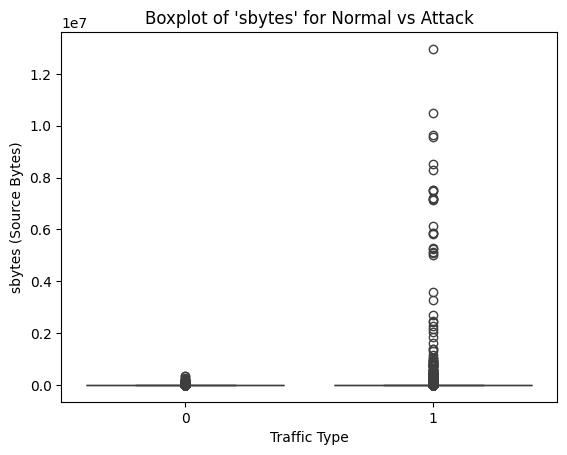

In [43]:
sns.boxplot(x=y_test, y=X_test['sbytes'])
plt.title("Boxplot of 'sbytes' for Normal vs Attack")
plt.xlabel("Traffic Type")
plt.ylabel("sbytes (Source Bytes)")
plt.show()